# [Lição de casa 1 da aula 7] 

Qualquer imagem de tamanho nl×nc tais que nl e nc são divisíveis por
8 e nl≥32, nc≥32 pode ser segmentada usando a rede fcn1.h5 treinada acima (por exemplo, imagens
maior1x.png e maior2x.png do BD). Estou impondo que nl e nc devem ser divisíveis por 8, pois a
rede fcn1.h5 reduz a resolução da imagem por 2 três vezes. No TF2, o programa acima funciona se
você simplesmente alimentar o programa com as imagens maiores (apesar de gerar warnings). É
possível evitar warnings, recriando a mesma rede de treino com entrada de tamanho maior (nl×nc)
e carregando os pesos da rede treinada (sem a estrutura da rede) usando o método
model.load_weights(nome_da_rede).
Faça o programa como descrito acima, evitando warnings. Teste esse programa nas imagens maior1x.png e maior2x.png, mostrando as saídas. A qualidade da segmentação será bastante ruim, pois
a rede não foi treinada para realizar esta tarefa. Mostre no vídeo que as saídas do seu programa e
que ele não gera warnings.
Esta propriedade (treinar rede completamente convolucional em imagens pequenas e aplicá-la em
imagens grandes) é usada em muitas aplicações.

In [28]:
#fcn-pred1.py - grad2020 - testada em colab para TF2
#Faz segmentacao semantica usando rede gerada pelo fcn-train1.py
import cv2
import numpy as np
import keras
from keras.models import load_model, Model, Sequential
from keras.layers import Dropout, Conv2D, Conv2DTranspose
from keras import optimizers
import sys
from sys import argv
import os

from keras.engine import InputLayer, Input

%matplotlib inline

In [29]:
bdDir = "/home/lucas/Desktop/poli/PSI3472/aula7/dados_in_ex1"
outDir = "/home/lucas/Desktop/poli/PSI3472/aula7/dados_out_ex1"; os.chdir(outDir)
nome="maior2"
inImgX = nome+"x.png"
inImgY = nome+"y.png"
outImgG =nome+"g.png"
outImgB =nome+"b.png"
arquivoRede = "fcn1.h5"

# A mudança foi feita aqui:

Trocamos a camada 1 de input por outra que tenha as dimensões da nova imagem, no caso **new_input_shape**.

In [30]:
new_input_shape = (72, 88, 1)

In [31]:
QX=cv2.imread(os.path.join(bdDir,inImgX),0)
QY=cv2.imread(os.path.join(bdDir,inImgY),0)
nl=QX.shape[0]; nc=QX.shape[1]
qx=np.float32(QX)/255.0 #Entre 0 e +1
qx=qx.reshape(1, nl, nc, 1)

In [32]:
# Gerando a rede com formato de entrada diferente
model = Sequential()

# Downsampling
model.add(Conv2D(40, kernel_size=(5,5), strides=2, activation='relu', padding='same', input_shape=new_input_shape)) #saida 16*16
model.add(Dropout(0.25))
model.add(Conv2D(12, kernel_size=(5,5), strides=2, activation='relu', padding='same')) #saida 8*8
model.add(Dropout(0.25))
model.add(Conv2D(12, kernel_size=(5,5), strides=2, activation='relu', padding='same')) #saida 4*4
model.add(Dropout(0.25))

# Upsampling
model.add(Conv2DTranspose(12, kernel_size=(5,5), strides=2, activation='relu', padding='same')) #saida 8*8
model.add(Dropout(0.25))
model.add(Conv2DTranspose(40, kernel_size=(5,5), strides=2, activation='relu', padding='same')) #saida 16*16
model.add(Dropout(0.25))
model.add(Conv2DTranspose(1, kernel_size=(5,5), strides=2, padding='same')) #saida 32*32

model.load_weights('fcn1.h5')

In [33]:
qp=model.predict(qx)
qp=qp.reshape(nl,nc) # entre 0 e +1

In [34]:
QPG=255.0*qp
QPG=np.clip(QPG,0,255) # Entre 0 e 255
QPG=np.uint8(QPG)
cv2.imwrite(os.path.join(outDir,outImgG),QPG)

True

In [35]:
QPB=np.zeros((nl,nc),dtype='uint8')
QPB[ qp>=0.5 ] = 255
cv2.imwrite(os.path.join(outDir,outImgB),QPB)

True

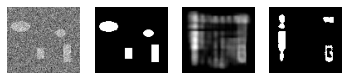

In [36]:
from matplotlib import pyplot as plt
f = plt.figure()
f.add_subplot(1,4,1)
plt.imshow(QX,cmap="gray")
plt.axis('off')
f.add_subplot(1,4,2)
plt.imshow(QY,cmap="gray")
plt.axis('off')
f.add_subplot(1,4,3)
plt.imshow(QPG,cmap="gray")
plt.axis('off')
f.add_subplot(1,4,4)
plt.imshow(QPB,cmap="gray")
plt.axis('off')
plt.show(block=True)